In [71]:
import numpy as np
import pandas as pd

df = pd.read_csv("Student_Performance.csv")
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No":0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [73]:
#Statistik Ringkasan
df.describe()

#Statistik Khusus
df.describe().T[["mean", "50%", "std", "min", "max"]]

,mean,50%,std,min,max
Hours Studied,4.9929,5.0,2.589309,1.0,9.0
Previous Scores,69.4457,69.0,17.343152,40.0,99.0
Extracurricular Activities,0.4948,0.0,0.499998,0.0,1.0
Sleep Hours,6.5306,7.0,1.695863,4.0,9.0
Sample Question Papers Practiced,4.5833,5.0,2.867348,0.0,9.0
Performance Index,55.2248,55.0,19.212558,10.0,100.0


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

# Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (Rpangkatdua):",r2_score(y_test, y_pred))
print("Koefisien Regresi:")
print(pd.Series(model.coef_, index=X.columns))

Mean Squared Error (MSE): 4.08262839852186
R-squared (Rpangkatdua): 0.9889832909573145
Koefisien Regresi:
Hours Studied                       2.852484
Previous Scores                     1.016988
Extracurricular Activities          0.608617
Sleep Hours                         0.476941
Sample Question Papers Practiced    0.191831
dtype: float64


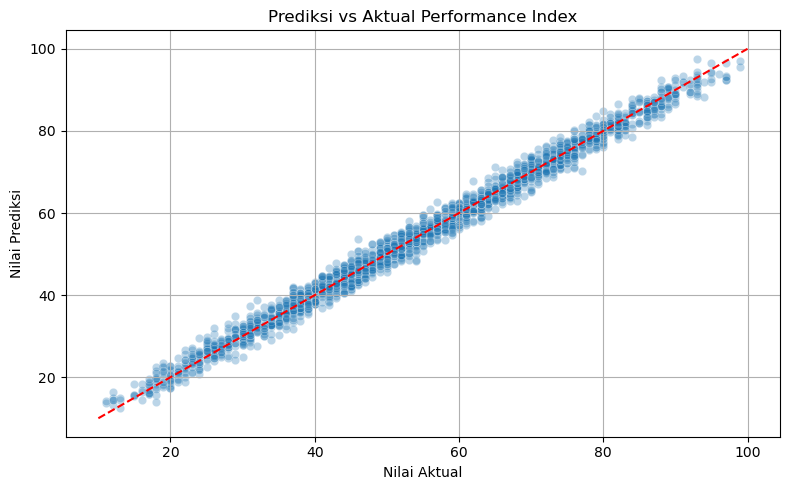

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Prediksi vs Aktual Performance Index")
plt.grid(True)
plt.tight_layout()
plt.show()

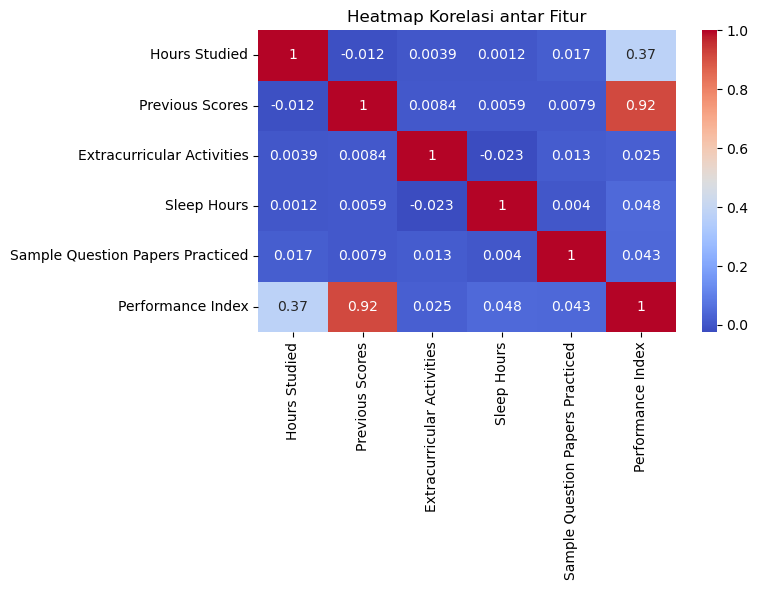

In [93]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi antar Fitur")
plt.tight_layout()
plt.show()